# 📊 Análisis de Ofertas Laborales en Ecuador (Completo)
Este notebook carga, limpia y analiza un dataset de ofertas de trabajo en Ecuador.
Incluye tablas, gráficos (Seaborn/Matplotlib) y un mini dashboard con Plotly.

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import unicodedata
import plotly.io as pio
pio.renderers.default = "colab"

sns.set(style="whitegrid")



## 1. Cargar datos

In [ ]:

import pandas as pd

# cargar el archivo
df = pd.read_csv("Datos/ofertas_ec_limpio.csv")

# Ver las primeras filas
print(df.head())

                                         cargo             modo  \
0                       desarrollador java jee  tiempo completo   
1  guardias de seguridad con experiencia 1 año  tiempo completo   
2                                     vendedor  tiempo completo   
3                                    topografo         por obra   
4                           asistente contable  tiempo completo   

  fechaPublicado    fechaFin  plazas      experiencia capacitacion  \
0     2013-02-22  2013-03-24       1  sin experiencia   0-50 horas   
1     2013-02-23  2013-02-28      20       7-12 meses   0-50 horas   
2     2013-02-23  2013-02-26       2         1-3 años   0-50 horas   
3     2013-02-23  2013-02-28       1         1-3 años   0-50 horas   
4     2013-02-25  2013-03-27       1         1-3 años   0-50 horas   

                      jornadas remuneracion      nivelInstruccion  ...  \
0  jornada ordinaria (8 horas)    $501-$750          tercer nivel  ...   
1  jornada ordinaria (8 hora

## 2. Filtros simples

In [3]:

# Normalizar la columna 'ciudad' para facilitar el filtrado
# 
ciudad_filtro = "quito"
area_filtro = None
nivel_filtro = None

df_filtrado = df.copy()
if ciudad_filtro:
    df_filtrado = df_filtrado[df_filtrado['ciudad_norm'] == ciudad_filtro]
if area_filtro:
    df_filtrado = df_filtrado[df_filtrado['areaEstudios'] == area_filtro]
if nivel_filtro:
    df_filtrado = df_filtrado[df_filtrado['nivelInstruccion'] == nivel_filtro]

df_filtrado.head()


,cargo,modo,fechaPublicado,fechaFin,plazas,experiencia,capacitacion,jornadas,remuneracion,nivelInstruccion,...,ciudad_norm,remuneracion_min,remuneracion_max,remuneracion_mid,exp_min_anios,exp_max_anios,exp_mid_anios,cap_min_h,cap_max_h,cap_mid_h
0,desarrollador java jee,tiempo completo,2013-02-22,2013-03-24,1,sin experiencia,0-50 horas,jornada ordinaria (8 horas),$501-$750,tercer nivel,...,quito,501.0,750.0,625.5,0.0,0.0,0.0,0.0,50.0,25.0
7,guardias de seguridad,tiempo completo,2013-02-25,2013-02-26,1,1-3 años,0-50 horas,jornada ordinaria (8 horas),$400-$500,bachiller,...,quito,400.0,500.0,450.0,1.0,3.0,2.0,0.0,50.0,25.0
8,recepcion,tiempo completo,2013-02-26,2013-03-28,1,1-3 años,0-50 horas,jornada ordinaria (8 horas),$400-$500,bachiller,...,quito,400.0,500.0,450.0,1.0,3.0,2.0,0.0,50.0,25.0
12,vendedor de percha,tiempo completo,2013-02-26,2013-02-28,1,1-3 años,0-50 horas,jornada ordinaria (8 horas),$400-$500,educación básica /básica superior,...,quito,400.0,500.0,450.0,1.0,3.0,2.0,0.0,50.0,25.0
13,trabajador (a) social,tiempo completo,2013-02-26,2013-03-06,1,4-6 años,0-50 horas,jornada ordinaria (8 horas),$1001-$1500,tercer nivel,...,quito,1001.0,1500.0,1250.5,4.0,6.0,5.0,0.0,50.0,25.0


## 3. Ranking de cargos más frecuentes

C:\Users\ROBERTO\AppData\Local\Temp\ipykernel_30048\724506328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cargos.index, x=top_cargos.values, palette="viridis")


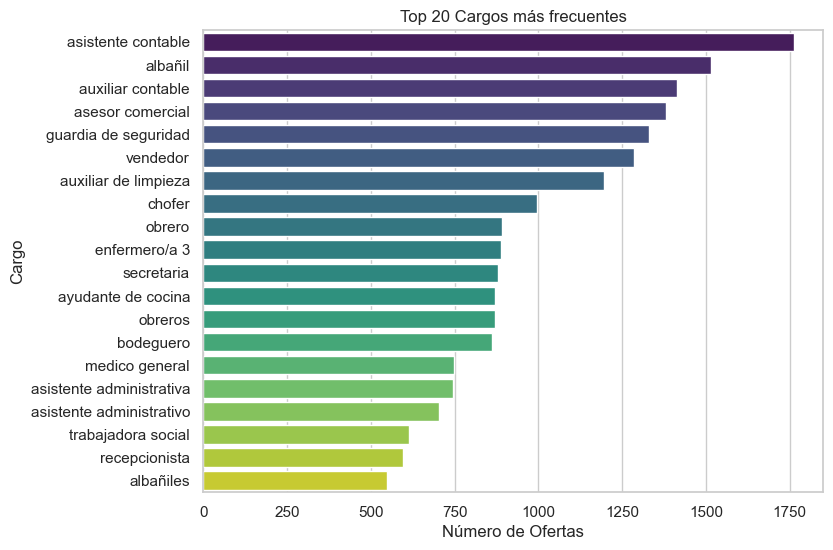

In [4]:

top_cargos = df['cargo'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.barplot(y=top_cargos.index, x=top_cargos.values, palette="viridis")
plt.title("Top 20 Cargos más frecuentes")
plt.xlabel("Número de Ofertas")
plt.ylabel("Cargo")
plt.show()


## 4. Heatmap Ciudad × Área de Estudio

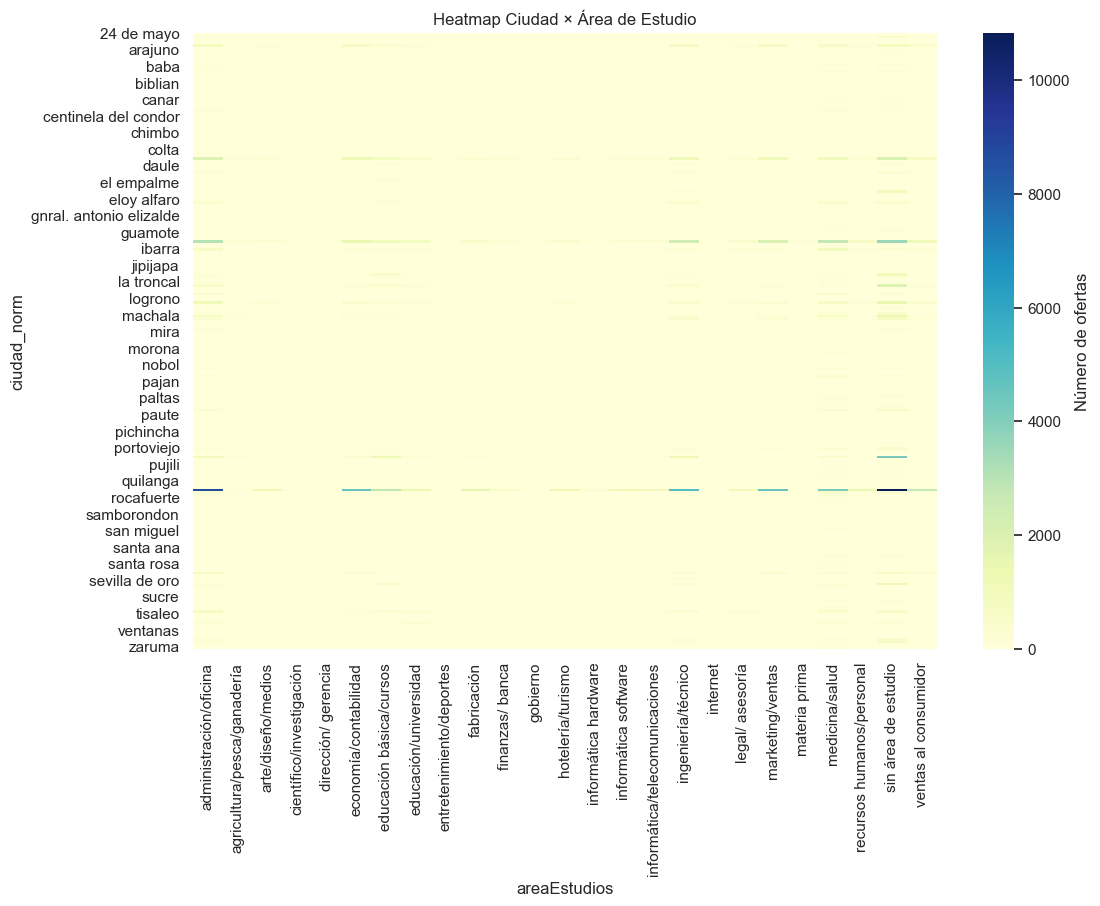

In [5]:

tabla_heatmap = pd.crosstab(df['ciudad_norm'], df['areaEstudios'])
plt.figure(figsize=(12,8))
sns.heatmap(tabla_heatmap, cmap="YlGnBu", cbar_kws={'label': 'Número de ofertas'})
plt.title("Heatmap Ciudad × Área de Estudio")
plt.show()


## 5. Estacionalidad: Ofertas por mes

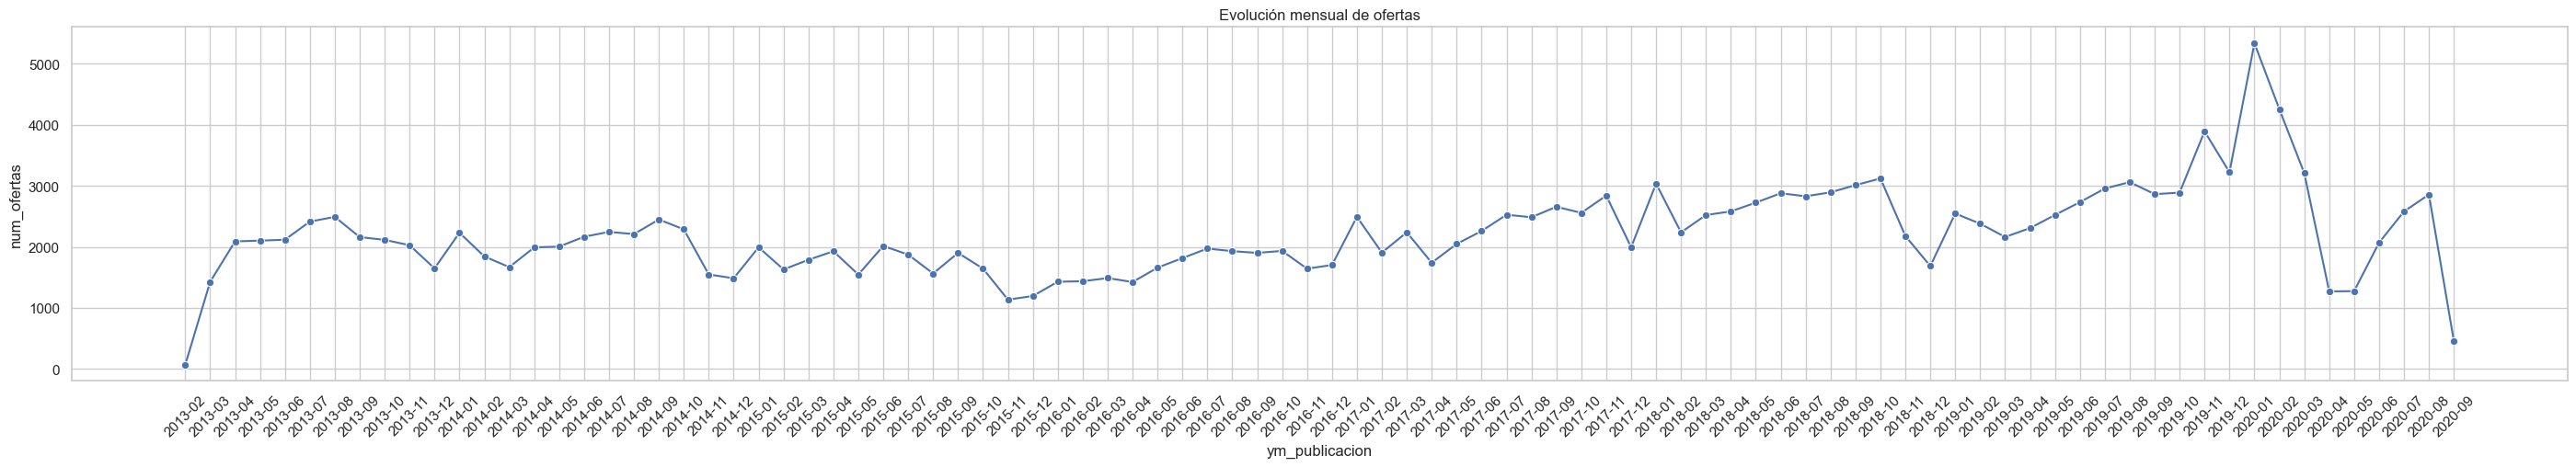

In [7]:

ofertas_mes = df.groupby('ym_publicacion').size().reset_index(name="num_ofertas")
plt.figure(figsize=(35,5))
sns.lineplot(x="ym_publicacion", y="num_ofertas", data=ofertas_mes, marker="o")
plt.xticks(rotation=45)
plt.title("Evolución mensual de ofertas")
plt.show()


## 6. Detección de outliers en remuneración

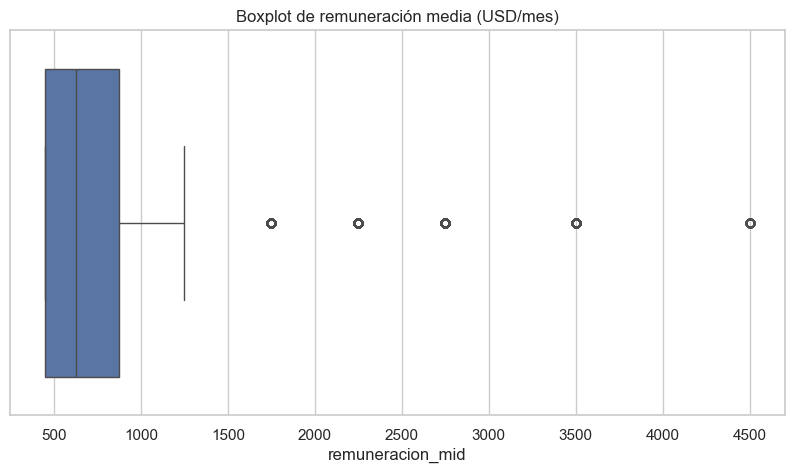

Número de outliers: 19272


,cargo,ciudad_titulo,remuneracion_mid
101,ingeniero civil (analista de servicios institu...,Quito,1750.5
127,relacionador comunitario,Quito,2250.5
135,ing. comercial,Tosagua,1750.5
196,ing. seguridad industrial,Santo Domingo De Los Tsachilas,1750.5
228,arqueolgo investigador,Sucre,1750.5


In [8]:

plt.figure(figsize=(10,5))
sns.boxplot(x=df['remuneracion_mid'])
plt.title("Boxplot de remuneración media (USD/mes)")
plt.show()

# Calcular outliers usando regla de IQR
Q1 = df['remuneracion_mid'].quantile(0.25)
Q3 = df['remuneracion_mid'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['remuneracion_mid'] < Q1 - 1.5*IQR) | (df['remuneracion_mid'] > Q3 + 1.5*IQR)]
print("Número de outliers:", len(outliers))
outliers[['cargo','ciudad_titulo','remuneracion_mid']].head()


## 7. Dashboard simple con Plotly

In [10]:
import pandas as pd

# Explicitly create a DataFrame from the top_cargos Series
top_cargos_df = pd.DataFrame({'cargo': top_cargos.index, 'num_ofertas': top_cargos.values})

fig1 = px.bar(top_cargos_df,
              x="num_ofertas", y="cargo", orientation="h", title="Top 20 Cargos")

fig2 = px.histogram(df, x="remuneracion_mid", nbins=30, title="Distribución de remuneración")

fig3 = px.line(ofertas_mes, x="ym_publicacion", y="num_ofertas", title="Ofertas por mes")

fig1.show()
fig2.show()
fig3.show()


In [11]:
#final de dashboard